In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
ad=pd.read_csv('/content/adm_data.csv')
ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
ad.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [4]:
ad.shape

(400, 9)

In [5]:
x=ad.iloc[:,[1,2,6]].values
print(x)

[[337.   118.     9.65]
 [324.   107.     8.87]
 [316.   104.     8.  ]
 ...
 [330.   116.     9.45]
 [312.   103.     8.78]
 [333.   117.     9.66]]


In [7]:
UA=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
  kmeans.fit(x)
  UA.append(kmeans.inertia_)

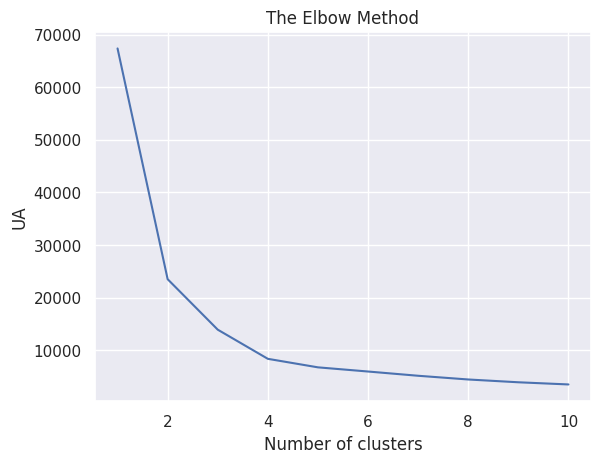

In [12]:
sns.set()
plt.plot(range(1,11),UA)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('UA')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)
print(y)

[3 1 0 1 0 3 1 0 2 1 1 1 1 0 0 0 0 1 1 2 0 1 3 3 3 3 1 2 2 0 2 1 3 3 3 1 2
 2 2 0 0 0 0 3 1 1 3 3 1 1 0 0 3 1 1 1 0 2 2 0 0 0 2 0 1 1 1 0 1 3 3 3 1 0
 0 3 1 2 2 2 0 3 1 1 3 0 0 0 0 0 0 2 2 2 2 2 2 3 3 1 1 0 0 0 1 0 1 3 3 2 0
 1 2 1 0 0 2 2 2 1 3 3 0 0 2 2 1 1 1 3 3 2 0 1 3 0 0 0 1 1 1 3 3 3 1 1 0 1
 3 0 3 3 1 1 1 0 0 0 0 2 0 2 1 0 1 1 2 0 2 0 0 3 1 1 1 1 3 1 0 0 2 0 2 0 0
 1 0 3 3 1 1 1 1 3 0 0 0 0 0 0 0 0 3 3 2 2 0 0 0 2 1 1 3 3 3 3 1 1 1 0 0 0
 1 0 0 2 0 0 1 1 0 1 0 2 3 1 1 3 0 2 2 0 1 1 0 1 0 0 1 1 1 0 0 3 1 0 0 1 1
 3 1 0 0 1 1 0 0 0 1 0 0 2 2 0 0 1 3 0 0 2 0 1 0 1 3 3 3 1 0 0 0 2 2 0 0 0
 0 1 3 0 0 1 1 1 0 1 1 1 0 0 1 1 0 2 0 0 2 2 1 1 0 1 0 2 0 1 2 2 1 2 1 0 0
 1 0 1 1 3 1 1 0 1 0 2 2 0 2 2 2 0 1 1 2 2 2 0 1 2 0 1 1 3 3 0 0 3 1 0 2 2
 0 1 3 1 0 2 2 2 2 0 1 1 1 2 3 3 2 0 2 1 0 0 1 0 1 1 1 3 0 3]


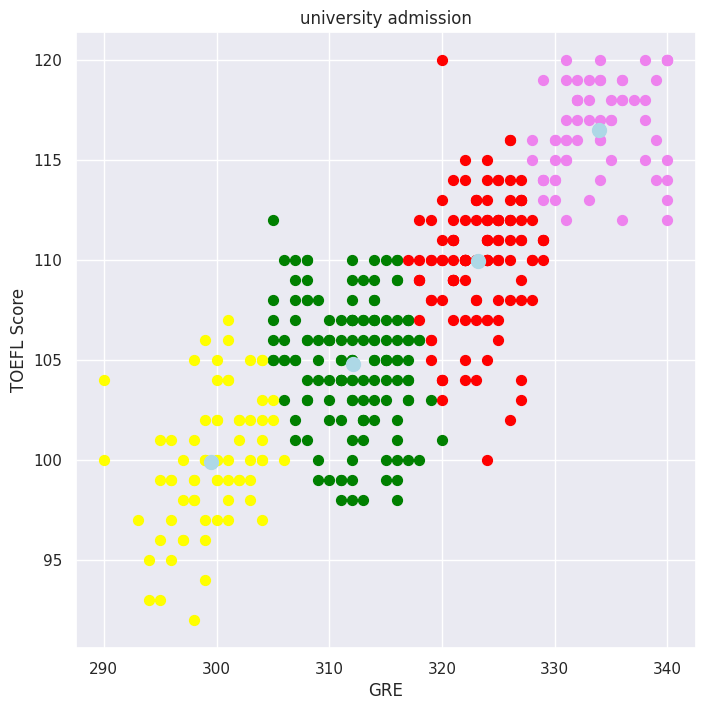

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='lightblue',label='centroid')
plt.title('university admission')
plt.xlabel('GRE')
plt.ylabel('TOEFL Score')
plt.show()

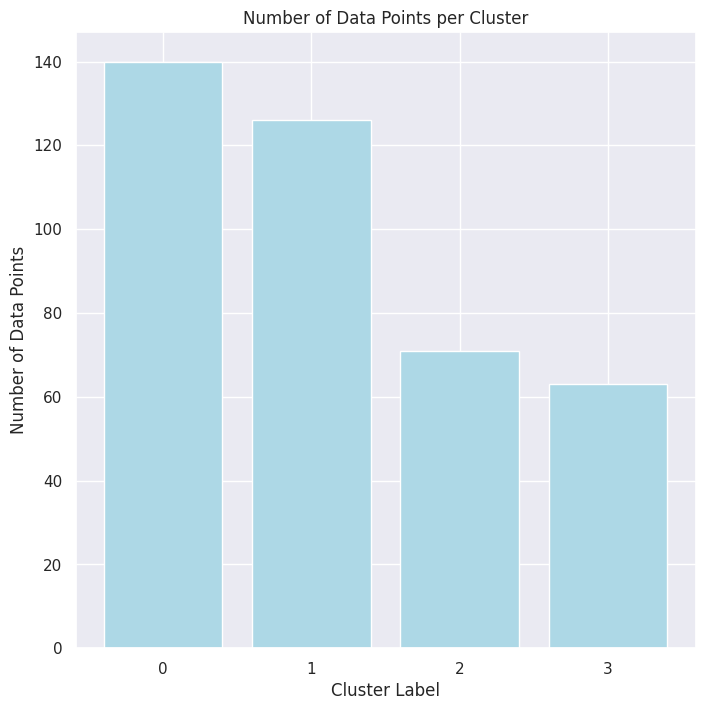

In [21]:
cluster_counts = pd.Series(y).value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.bar(cluster_counts.index, cluster_counts.values, color="lightblue")
plt.title("Number of Data Points per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.xticks(cluster_counts.index)
plt.show()